In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
mouse_metadata_path="/Users/guoyalong/Desktop/homework/Pymaceuticals-/data/Mouse_metadata.csv"
study_results_path="/Users/guoyalong/Desktop/homework/Pymaceuticals-/data/Study_results.csv"

In [4]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
merged_data=pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
merged_data["Mouse ID"].nunique()

249

In [7]:
duplicated_mice =merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [8]:
cleaned_data =merged_data[merged_data['Mouse ID'].isin(duplicated_mice)==False]
cleaned_data["Mouse ID"].nunique()

248

In [9]:
mean = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
median = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
var = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
std = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
regimen_count=cleaned_data["Drug Regimen"].value_counts()
regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: title={'center': 'Total Number of Rows per Drug Regimen (Pandas)'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

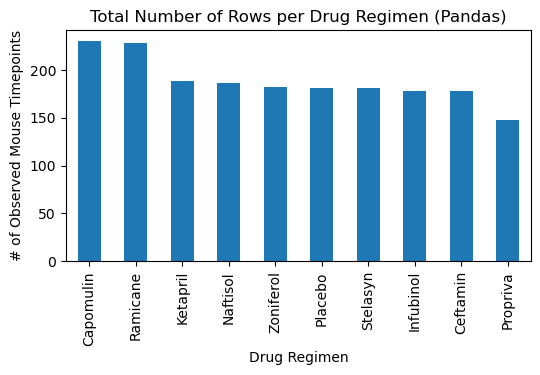

In [11]:
regimen_count.plot(kind='bar', figsize=(6, 3),ylabel="# of Observed Mouse Timepoints", title='Total Number of Rows per Drug Regimen (Pandas)')


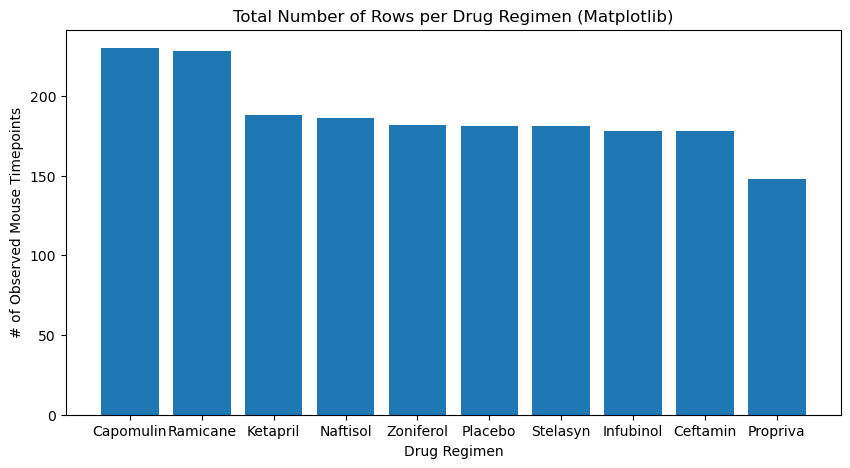

In [12]:
plt.figure(figsize=(10, 5))
plt.bar(regimen_count.index, regimen_count.values)
plt.title('Total Number of Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [13]:
gender_distrib=cleaned_data['Sex'].value_counts()
gender_distrib

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='Sex'>

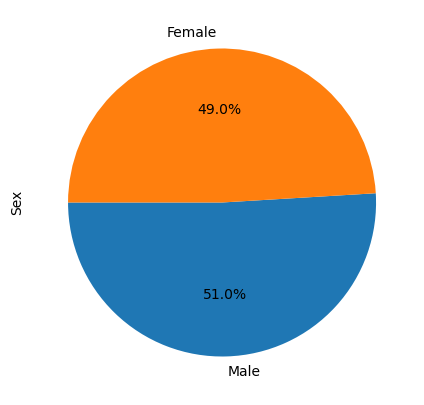

In [14]:
gender_distrib.plot(kind='pie',autopct='%1.1f%%',ylabel="Sex", startangle=180, figsize=(5, 5),)


<function matplotlib.pyplot.show(close=None, block=None)>

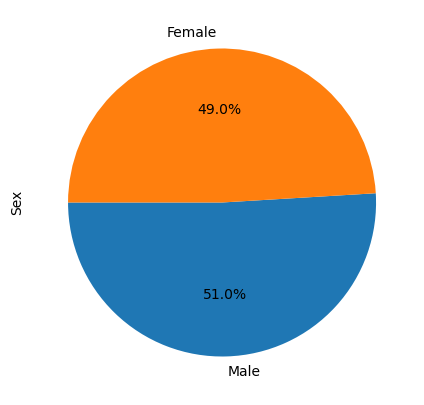

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(gender_distrib,labels=gender_distrib.index,autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')
plt.show

In [20]:
Capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ceftamin", :]